In [8]:
sf_location = catalog.load("sf_location")
#preprocessed_companies = catalog.load("preprocessed_companies")
#reviews = catalog.load("reviews")

#master = create_master_table(preprocessed_shuttles, preprocessed_companies, reviews)
sf_location.head()

2020-03-11 12:21:39,371 - kedro.io.data_catalog - INFO - Loading data from `sf_location` (CSVDataSet)...


,position_id,driver_id,latitude,longitude,time,source
0,0,adkavy,37.61549,-122.38821,1.213037e+12,San_Francisco
1,1,adkavy,37.61562,-122.38849,1.213037e+12,San_Francisco
2,2,adkavy,37.61518,-122.39029,1.213037e+12,San_Francisco
3,3,adkavy,37.61393,-122.39508,1.213037e+12,San_Francisco
4,4,adkavy,37.60493,-122.38362,1.213037e+12,San_Francisco


In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

In [3]:
#converting unix timestamp to datetime format

sf_location['datetime'] = pd.to_datetime(sf_location['time'],unit='ms')
print(sf_location)

          position_id driver_id  latitude  longitude           time  \
0                   0    adkavy  37.61549 -122.38821  1213037028000   
1                   1    adkavy  37.61562 -122.38849  1213036968000   
2                   2    adkavy  37.61518 -122.39029  1213036903000   
3                   3    adkavy  37.61393 -122.39508  1213036843000   
4                   4    adkavy  37.60493 -122.38362  1213036783000   
...               ...       ...       ...        ...            ...   
11219950     11219950  aducrisi  37.76247 -122.39555  1211055456000   
11219951     11219951  aducrisi  37.76116 -122.39350  1211055391000   
11219952     11219952  aducrisi  37.76039 -122.39338  1211055343000   
11219953     11219953  aducrisi  37.75488 -122.39287  1211055282000   
11219954     11219954  aducrisi  37.74995 -122.39262  1211055222000   

                 source            datetime  
0         San_Francisco 2008-06-09 18:43:48  
1         San_Francisco 2008-06-09 18:42:48  
2        

In [6]:
sf_location

,position_id,driver_id,latitude,longitude,time,source,datetime
0,0,adkavy,37.61549,-122.38821,1213037028000,San_Francisco,2008-06-09 18:43:48
1,1,adkavy,37.61562,-122.38849,1213036968000,San_Francisco,2008-06-09 18:42:48
2,2,adkavy,37.61518,-122.39029,1213036903000,San_Francisco,2008-06-09 18:41:43
3,3,adkavy,37.61393,-122.39508,1213036843000,San_Francisco,2008-06-09 18:40:43
4,4,adkavy,37.60493,-122.38362,1213036783000,San_Francisco,2008-06-09 18:39:43
...,...,...,...,...,...,...,...
11219950,11219950,aducrisi,37.76247,-122.39555,1211055456000,San_Francisco,2008-05-17 20:17:36
11219951,11219951,aducrisi,37.76116,-122.39350,1211055391000,San_Francisco,2008-05-17 20:16:31
11219952,11219952,aducrisi,37.76039,-122.39338,1211055343000,San_Francisco,2008-05-17 20:15:43
11219953,11219953,aducrisi,37.75488,-122.39287,1211055282000,San_Francisco,2008-05-17 20:14:42


In [7]:
type(sf_location)

pandas.core.frame.DataFrame

In [8]:
#disctinct values
sf_location.nunique()

position_id    11219955
driver_id           536
latitude          59952
longitude         51384
time            2023603
source                1
datetime        2023603
dtype: int64

In [9]:
#% of missing values
percent_missing = sf_location.isnull().sum() * 100 / len(sf_location)
percent_missing

2020-03-11 10:42:25,166 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-03-11 10:42:25,167 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


position_id    0.0
driver_id      0.0
latitude       0.0
longitude      0.0
time           0.0
source         0.0
datetime       0.0
dtype: float64

In [26]:
sf_location.isnull().sum()

position_id    0
driver_id      0
latitude       0
longitude      0
time           0
source         0
dtype: int64

In [40]:
sf_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219955 entries, 0 to 11219954
Data columns (total 7 columns):
position_id    int64
driver_id      object
latitude       float64
longitude      float64
time           int64
source         object
datetime       datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 599.2+ MB


In [15]:
#No of most frequent values
sf_location['driver_id'].value_counts().max()  

49367

In [16]:
#Most frequent driver id
sf_location['driver_id'].value_counts().idxmax()

'upthin'

In [23]:
#Records where driver id = upthin
sf_location.loc[sf_location['driver_id'] == 'upthin']

,position_id,driver_id,latitude,longitude,time,source
310698,310698,upthin,37.78611,-122.45610,1213038835000,San_Francisco
310699,310699,upthin,37.78611,-122.45610,1213038833000,San_Francisco
310700,310700,upthin,37.77283,-122.41278,1213038830000,San_Francisco
310701,310701,upthin,37.78674,-122.45509,1213038773000,San_Francisco
310702,310702,upthin,37.77059,-122.41517,1213038749000,San_Francisco
...,...,...,...,...,...,...
360060,360060,upthin,37.74917,-122.41593,1211028791000,San_Francisco
360061,360061,upthin,37.74839,-122.41142,1211028731000,San_Francisco
360062,360062,upthin,37.74952,-122.40298,1211028676000,San_Francisco
360063,360063,upthin,37.75007,-122.39533,1211028614000,San_Francisco


In [22]:
sf_location['driver_id'].value_counts()

upthin      49367
udwadla     33753
equioc      29997
enkkand     29742
ejshigib    29536
            ...  
objoyhi      1495
ifeshce      1003
oilrag        932
egoiwroi      185
eotcue         59
Name: driver_id, Length: 536, dtype: int64

In [24]:
percent_frequent = sf_location['driver_id'].value_counts().max() * 100 / len(sf_location)
percent_frequent

0.4399928520212425

In [29]:
#maximum lenght of each column - to edit
measurer = np.vectorize(len)
res1 = measurer(sf_location.values.astype(str)).max(axis=0)

In [30]:
res1

array([ 8,  8, 18, 19, 13, 13])

In [58]:
#earliest and latest record in the dataset
print (sf_location.datetime.min())
print (sf_location.datetime.max())

2008-05-17 10:00:04
2008-06-10 09:25:34


In [59]:
sf_location['day'] = sf_location["datetime"].dt.day
sf_location['month'] = sf_location["datetime"].dt.month
sf_location

,position_id,driver_id,latitude,longitude,time,source,datetime,day,month
0,0,adkavy,37.61549,-122.38821,1213037028000,San_Francisco,2008-06-09 18:43:48,9,6
1,1,adkavy,37.61562,-122.38849,1213036968000,San_Francisco,2008-06-09 18:42:48,9,6
2,2,adkavy,37.61518,-122.39029,1213036903000,San_Francisco,2008-06-09 18:41:43,9,6
3,3,adkavy,37.61393,-122.39508,1213036843000,San_Francisco,2008-06-09 18:40:43,9,6
4,4,adkavy,37.60493,-122.38362,1213036783000,San_Francisco,2008-06-09 18:39:43,9,6
...,...,...,...,...,...,...,...,...,...
11219950,11219950,aducrisi,37.76247,-122.39555,1211055456000,San_Francisco,2008-05-17 20:17:36,17,5
11219951,11219951,aducrisi,37.76116,-122.39350,1211055391000,San_Francisco,2008-05-17 20:16:31,17,5
11219952,11219952,aducrisi,37.76039,-122.39338,1211055343000,San_Francisco,2008-05-17 20:15:43,17,5
11219953,11219953,aducrisi,37.75488,-122.39287,1211055282000,San_Francisco,2008-05-17 20:14:42,17,5


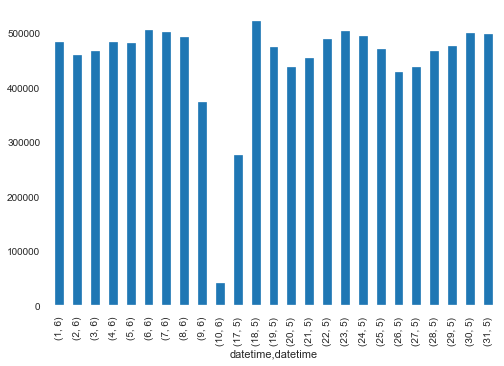

In [15]:
sf_location_daymonth_group = sf_location['position_id'].groupby([sf_location["datetime"].dt.day, sf_location["datetime"].dt.month]).count()
#sf_location_daymonth_group.sort_values(['datetime'], ascending=False)
#print(sf_location_daymonth_group)

sf_location_daymonth_group_df = sf_location_daymonth_group.to_frame()
sf_location_daymonth_group.plot(kind="bar")

#sf_location_daymonth_group = sf_location.sort_values(['month'], ascending=[True]).groupby([sf_location["day"], sf_location["month"]]).count()

#sf_location_daymonth_group.sort_values(['day', 'month'], ascending=[True, True])
#sf_location_daymonth_group.month.sort_values()
#sf_location_daymonth_group[]


In [89]:
sf_location.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,position_id,latitude,longitude,time,day,month
count,11219955.000000,11219955.000000,11219955.000000,11219955.000000,11219955.000000,11219955.000000
mean,5609977.000000,37.763601,-122.412432,1212036387546.543701,16.854918,5.382194
std,3238922.164110,0.053860,0.035782,588563007.649678,10.039103,0.485924
min,0.000000,32.869700,-127.081430,1211018404000.000000,1.000000,5.000000
25%,2804988.500000,37.755130,-122.425250,1211522849000.000000,6.000000,5.000000
50%,5609977.000000,37.781070,-122.411060,1212043218000.000000,20.000000,5.000000
75%,8414965.500000,37.790450,-122.400270,1212548811000.000000,26.000000,6.000000
max,11219954.000000,50.305460,-115.562180,1213089934000.000000,31.000000,6.000000


In [86]:
sf_location.head()


,position_id,driver_id,latitude,longitude,time,source,datetime,day,month
0,0,adkavy,37.61549,-122.38821,1213037028000,San_Francisco,2008-06-09 18:43:48,9,6
1,1,adkavy,37.61562,-122.38849,1213036968000,San_Francisco,2008-06-09 18:42:48,9,6
2,2,adkavy,37.61518,-122.39029,1213036903000,San_Francisco,2008-06-09 18:41:43,9,6
3,3,adkavy,37.61393,-122.39508,1213036843000,San_Francisco,2008-06-09 18:40:43,9,6
4,4,adkavy,37.60493,-122.38362,1213036783000,San_Francisco,2008-06-09 18:39:43,9,6


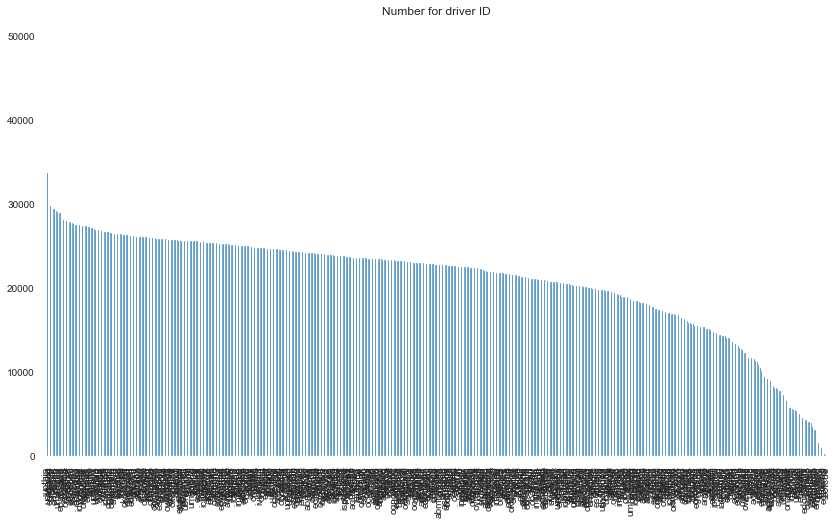

In [33]:
import matplotlib.pyplot as plt
ax = sf_location['driver_id'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for driver ID")
#ax.set_xlabel("Owner Names")
#ax.set_ylabel("Frequency")
plt.show()

In [90]:
#joining data
rome_location = catalog.load("rome_location")
rome_location.head()

2020-03-10 14:10:55,915 - kedro.io.data_catalog - INFO - Loading data from `rome_location` (CSVDataSet)...


,position_id,driver_id,latitude,longitude,time,source
0,30000000,156,41.883672,12.487778,1.265065e+12,Rome
1,30000001,187,41.928543,12.469037,1.265065e+12,Rome
2,30000002,297,41.891069,12.492705,1.265065e+12,Rome
3,30000003,89,41.793177,12.432122,1.265065e+12,Rome
4,30000004,79,41.900275,12.462746,1.265065e+12,Rome


In [93]:
sf_location = catalog.load("sf_location")
sf_location.head()

2020-03-10 14:11:59,396 - kedro.io.data_catalog - INFO - Loading data from `sf_location` (CSVDataSet)...


,position_id,driver_id,latitude,longitude,time,source
0,0,adkavy,37.61549,-122.38821,1213037028000,San_Francisco
1,1,adkavy,37.61562,-122.38849,1213036968000,San_Francisco
2,2,adkavy,37.61518,-122.39029,1213036903000,San_Francisco
3,3,adkavy,37.61393,-122.39508,1213036843000,San_Francisco
4,4,adkavy,37.60493,-122.38362,1213036783000,San_Francisco


In [97]:
sf_location.source.nunique()

1

In [104]:
location_df = sf_location.append(rome_location)
location_df.head()

,position_id,driver_id,latitude,longitude,time,source
0,0,adkavy,37.61549,-122.38821,1.213037e+12,San_Francisco
1,1,adkavy,37.61562,-122.38849,1.213037e+12,San_Francisco
2,2,adkavy,37.61518,-122.39029,1.213037e+12,San_Francisco
3,3,adkavy,37.61393,-122.39508,1.213037e+12,San_Francisco
4,4,adkavy,37.60493,-122.38362,1.213037e+12,San_Francisco


In [100]:
sf_crash = catalog.load("sf_crash")
sf_crash.head()

2020-03-10 14:14:53,972 - kedro.io.data_catalog - INFO - Loading data from `sf_crash` (CSVDataSet)...


,driver_id,time,crash,source
0,adkavy,1213037028000,0,San_Francisco
1,adkavy,1213036968000,0,San_Francisco
2,adkavy,1213036903000,0,San_Francisco
3,adkavy,1213036843000,0,San_Francisco
4,adkavy,1213036783000,0,San_Francisco


In [101]:
rome_crash = catalog.load("rome_crash")
rome_crash.head()

2020-03-10 14:15:12,086 - kedro.io.data_catalog - INFO - Loading data from `rome_crash` (CSVDataSet)...


,driver_id,time,crash,source
0,156,1.265065e+12,0,Rome
1,187,1.265065e+12,0,Rome
2,297,1.265065e+12,0,Rome
3,89,1.265065e+12,0,Rome
4,79,1.265065e+12,0,Rome


In [103]:
crash_df = sf_crash.append(rome_crash)
crash_df.head()

,driver_id,time,crash,source
0,adkavy,1.213037e+12,0,San_Francisco
1,adkavy,1.213037e+12,0,San_Francisco
2,adkavy,1.213037e+12,0,San_Francisco
3,adkavy,1.213037e+12,0,San_Francisco
4,adkavy,1.213037e+12,0,San_Francisco


In [108]:
temp = crash_df.loc[crash_df['driver_id'] == 'adkavy']
print(temp)

      driver_id          time  crash         source
0        adkavy  1.213037e+12      0  San_Francisco
1        adkavy  1.213037e+12      0  San_Francisco
2        adkavy  1.213037e+12      0  San_Francisco
3        adkavy  1.213037e+12      0  San_Francisco
4        adkavy  1.213037e+12      0  San_Francisco
...         ...           ...    ...            ...
19537    adkavy  1.211035e+12      0  San_Francisco
19538    adkavy  1.211035e+12      0  San_Francisco
19539    adkavy  1.211034e+12      0  San_Francisco
19540    adkavy  1.211034e+12      0  San_Francisco
19541    adkavy  1.211034e+12      0  San_Francisco

[19542 rows x 4 columns]


In [109]:
merged_dataframe = location_df.merge(crash_df, how='left', left_on=['driver_id', 'time'], right_on=['driver_id', 'time'])
merged_dataframe.head()

,position_id,driver_id,latitude,longitude,time,source_x,crash,source_y
0,0,adkavy,37.61549,-122.38821,1.213037e+12,San_Francisco,0,San_Francisco
1,1,adkavy,37.61562,-122.38849,1.213037e+12,San_Francisco,0,San_Francisco
2,2,adkavy,37.61518,-122.39029,1.213037e+12,San_Francisco,0,San_Francisco
3,3,adkavy,37.61393,-122.39508,1.213037e+12,San_Francisco,0,San_Francisco
4,4,adkavy,37.60493,-122.38362,1.213037e+12,San_Francisco,0,San_Francisco


In [110]:
merged_dataframe['datetime'] = pd.to_datetime(merged_dataframe['time'],unit='ms')
print(merged_dataframe)

          position_id driver_id   latitude   longitude          time  \
0                   0    adkavy  37.615490 -122.388210  1.213037e+12   
1                   1    adkavy  37.615620 -122.388490  1.213037e+12   
2                   2    adkavy  37.615180 -122.390290  1.213037e+12   
3                   3    adkavy  37.613930 -122.395080  1.213037e+12   
4                   4    adkavy  37.604930 -122.383620  1.213037e+12   
...               ...       ...        ...         ...           ...   
33037801     51817846       220  41.901199   12.484496  1.267657e+12   
33037802     51817847       324  41.897262   12.472831  1.267657e+12   
33037803     51817848       266  41.909772   12.529965  1.267657e+12   
33037804     51817849       360  41.912769   12.417502  1.267657e+12   
33037805     51817850       113  41.880361   12.508293  1.267657e+12   

               source_x  crash       source_y                      datetime  
0         San_Francisco      0  San_Francisco 2008-06-09 

In [111]:
location_crash_df = merged_dataframe.drop(['source_y', 'time'], axis=1)
location_crash_df.head()

,position_id,driver_id,latitude,longitude,source_x,crash,datetime
0,0,adkavy,37.61549,-122.38821,San_Francisco,0,2008-06-09 18:43:48
1,1,adkavy,37.61562,-122.38849,San_Francisco,0,2008-06-09 18:42:48
2,2,adkavy,37.61518,-122.39029,San_Francisco,0,2008-06-09 18:41:43
3,3,adkavy,37.61393,-122.39508,San_Francisco,0,2008-06-09 18:40:43
4,4,adkavy,37.60493,-122.38362,San_Francisco,0,2008-06-09 18:39:43


In [152]:
driver_numeric = pd.to_numeric(location_crash_df['driver_id'], errors='coerce').isna()
#driver_numeric.loc[driver_numeric['driver_id'] == True].count()
driver_numeric

AttributeError: 'Series' object has no attribute 'info'

In [153]:
#driver_numeric.loc[driver_numeric['driver_id'] == True].count()
driver_numeric.value_counts(sort=False)

False    21817851
True     11219955
Name: driver_id, dtype: int64

In [155]:
driver_numeric_temp = pd.to_numeric(location_crash_df['driver_id'], errors='coerce')
driver_numeric_temp

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
33037801    220.0
33037802    324.0
33037803    266.0
33037804    360.0
33037805    113.0
Name: driver_id, Length: 33037806, dtype: float64

In [157]:
driver_numeric_temp.dropna().count()

21817851

In [149]:
len(location_crash_df)

33037806

In [ ]:
#find driver ids that are numerical
location_crash_df.dtypes
#df.loc[:, ['A']]
driver_value_check = location_crash_df.loc[:, ['driver_id']].applymap(np.isreal)
driver_value_check

In [112]:
location_crash_df.groupby('crash').count()

,position_id,driver_id,latitude,longitude,source_x,datetime
crash,,,,,,
0,33037533,33037533,33037533,33037533,33037533,33037533
1,273,273,273,273,273,273


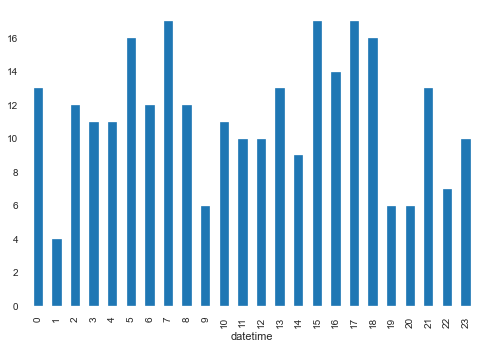

In [118]:
#crashes per hour
#location_crash_df['position_id'].groupby([location_crash_df['datetime'].dt.hour]).count()
crashes_per_hour = location_crash_df['position_id'].loc[location_crash_df['crash'] == 1].groupby([location_crash_df['datetime'].dt.hour]).count()
crashes_per_hour.plot(kind="bar")

In [140]:
#drivers with most crashes

crashes_per_person = location_crash_df['driver_id'].loc[location_crash_df['crash'] == 1].groupby([location_crash_df['driver_id']]).size().reset_index(name='counts')
#crashes_per_person.loc[crashes_per_person['counts'] > 1].plot(kind="bar")
crashes_per_person.sort_values(['counts'], ascending=False)

,driver_id,counts
100,366,3
134,edjiye,3
198,oiphye,3
108,agjitfa,2
183,itmeps,2
...,...,...
85,310,1
86,313,1
87,315,1
88,318,1


In [2]:
import pandas as pd

sf_location.head()

,position_id,driver_id,latitude,longitude,time,source
0,0,adkavy,37.61549,-122.38821,1213037028000,San_Francisco
1,1,adkavy,37.61562,-122.38849,1213036968000,San_Francisco
2,2,adkavy,37.61518,-122.39029,1213036903000,San_Francisco
3,3,adkavy,37.61393,-122.39508,1213036843000,San_Francisco
4,4,adkavy,37.60493,-122.38362,1213036783000,San_Francisco


In [9]:
from defender.pandas_rules import NotMissing

rule   = NotMissing(columns='time')
result = rule.validate(sf_location)            # rule.validate() -> ValidationResult

ValidationError: 
[31mValidation Failed
[0m[31mdefender.pandas_rules.NotMissing(columns=time, pass_ratio=1.0)[0m[31m
Errors:
[0m* `NotMissing` failed for column `time`   |   failed count: 3 (0.00%), max allowed: 0 (0.00%)
  Bad examples: [nan]
  Bad ilocs: [23, 29, 55]

In [5]:
if result:
    print("👌")   # success
    print(result)
else:
    print("💩")   # failure
    print(result)

👌
Validation Successful
defender.pandas_rules.NotMissing(columns=time, pass_ratio=1.0)


In [6]:
assert result

In [10]:
rule   = NotMissing()
result = rule.validate(sf_location, silent=True)

print(result)

Validation Failed
defender.pandas_rules.NotMissing(pass_ratio=1.0)
Errors:
* `NotMissing` failed for column `driver_id`   |   failed count: 2 (0.00%), max allowed: 0 (0.00%)
  Bad examples: [nan]
  Bad ilocs: [25, 53]
* `NotMissing` failed for column `latitude`   |   failed count: 1 (0.00%), max allowed: 0 (0.00%)
  Bad examples: [nan]
  Bad ilocs: [15]
* `NotMissing` failed for column `longitude`   |   failed count: 1 (0.00%), max allowed: 0 (0.00%)
  Bad examples: [nan]
  Bad ilocs: [10]
* `NotMissing` failed for column `time`   |   failed count: 3 (0.00%), max allowed: 0 (0.00%)
  Bad examples: [nan]
  Bad ilocs: [23, 29, 55]
* `NotMissing` failed for column `source`   |   failed count: 1 (0.00%), max allowed: 0 (0.00%)
  Bad examples: [nan]
  Bad ilocs: [18]
